# Assigment 3 (Shor's Algorithm)

In this assignment, we will work through the disparate parts of Shor's algorithm to run through the various parts of the algorithm that were not clearly explored in our lectures.


Note that the problems build upon each other. You will have to solve a previous problem to move on to the next part.


## Problem 1

Suppose we are interested in factoring the number $77$ which we know as $11 \times 7$ using a quantum computer and choose $a = 4$ as our number. 

We construct the quantum circuit that implements the function 

$f(j) = 10^j \bmod 77$.

(a) What is the order $r$ of $10$ modulo $77$?


YOUR ANSWER HERE

(b) Find a number $a$ whose order modulo $77$ is odd? (Hint: you can do trial and error or you can start with the answer to the previous problem :-)

YOUR ANSWER HERE

(c) What factor (if any) of $77$ can we extract by knowing ithe order of $10$ modulo $77$? Show the steps.

YOUR ANSWER HERE

(d) Repeat part (c) for $a = 12$. Find the order of $a$ modulo $77$, check if we can find any prime factors of $77$ using the information.

YOUR ANSWER HERE

(e) Implement a classical function to find the order of $a$ modulo $n$ where $a, n$ are inputs.

In [1]:
def find_order(a, n):
    # your code here
    for i in range(1,n):
        if a**i%n == 1:
            return i
    # raise NotImplementedError

(d) We claimed that if we randomly picked a number $a$ with such that  $GCD(a,n) \not= 1$ (if $a,n$ have a non-trivial prime factor in common and we are done), then following will hold with probability at least $\frac{1}{2}$:
   - Order `r` of `a` modulo `n` is even, and 
   - $a^{r/2} + 1 \bmod n \not= 0$
   
 
   
Write a function `count_hits(n)` that runs through all numbers $a$ from $2$ to $n-1$, ignoring the ones for which $GCD(a, n) \not=  1$ (in which case we will find a factor purely by chance) and counts the number of "hits" wherein a hit happens for $a$ iff 
 - Order of $a$ modulo $n$ is even, 
 - $a^{r/2} + 1 \bmod n \not= 0$ where $r$ is the order of $a$ modulo $n$.
 
 
 Useful functions `gcd` and `modular_exponentiate` given below.
 

In [2]:
def gcd(m, n):
    (m, n) = max(m, n), min(m, n)
    assert m > 0
    assert n >= 0
    while n > 0:
        (m, n) = (n, m%n)
    return m

def modular_exponentiate(a, k, n): # a^k \mod n
    m = a
    j = 0
    res = 1
    while k > 0:
        if k % 2 == 1:
            res = (res * m) % n
        
        m = (m * m) % n
        j = j + 1
        k = k // 2
    return res


In [3]:
def count_hits(n):
    # your code here
    count = 0
    for i in range(2,n):
        if gcd(i,n) == 1 and find_order(i,n)%2 == 0:
            if (modular_exponentiate(i,find_order(i,n)/2,n) + 1)%n != 0:
                count += 1
    return count
    raise NotImplementedError

In [4]:
h15 = count_hits(15)
print(f'count_hits(15) = {h15}')
assert h15 == 6 # hits for 15 are 2, 4, 7, 8, 11, 13
# note that \varphi(15) = 2 * 4 = 8
print(f'Fraction of hits among relatively prime = {h15/(2*4)}')

h77 = count_hits(77) # there should be 46 hits for 77
print(f'count_hits(77) = {h77}')
assert h77 == 30
# note that \varphi(77) = 6 * 10 = 60
print(f'Fraction of hits among relatively prime = {h77/(60)}')


h91 = count_hits(91)
print(f'count_hits(91) = {h91}')
assert h91 == 54
# note \varphi(91) = 12 * 6 = 72
print(f'Fraction of hits among relatively prime = {h91/(72)}')

h111 = count_hits(111) # there whould be 92 hits
print(f'count_hits(111) = {h111}')
assert h111 == 54
# note \varphi(111) = 36 * 2 = 72
print(f'Fraction of hits among relatively prime = {h111/(72)}')


h893 = count_hits(893)
print(f'count_hits(893) = {h893}')
assert h893 == 414


count_hits(15) = 6
Fraction of hits among relatively prime = 0.75
count_hits(77) = 30
Fraction of hits among relatively prime = 0.5
count_hits(91) = 54
Fraction of hits among relatively prime = 0.75
count_hits(111) = 54
Fraction of hits among relatively prime = 0.75
count_hits(893) = 414


Hopefully the above code will show at least empirically (if the proof given in our notes was too much for you), that a random choice of `a` has a high probability of helping us find a non-trivial factor of `n` if we can compute its order fast.

## Problem 2

$$\newcommand\ket[1]{\left| #1 \right\rangle}$$
We will now explore the use of QFT to extract the order $r$.  We will skip the construction of the circuit to implement the function $f(j) = a^j \bmod n$ for fixed $a$.


__(A)__ Suppose $a = 2$ and $n=15$, and suppose the first measurement in Shor's algorithm yielded $f(x) = 8$. Write down the superposition for the input qubits after this measurement is performed.


YOUR ANSWER HERE

__(B)__ Write a classical function `find_possible_inputs(a, n, m, k)` that outputs a list of all numbers $x$ from $1, \ldots, 2^m -1$  such that $a^x \mod n = k$. The list must be output in ascending order.

As an example, `find_possible_inputs(5, 21, 4)` must yield `[2, 8, 14, 20]` 

In [5]:
def find_possible_inputs(a, n, k, m):
    # your code here
    possible_inputs = []
    for i in range(1,2**m):
        if modular_exponentiate(a,i,n)%n == k:
            possible_inputs.append(i)
    return possible_inputs
    raise NotImplementedError
    

In [6]:
lst1 = find_possible_inputs(5, 21, 4, 5)
print('lst1 =', lst1)
assert lst1 == [2, 8, 14, 20, 26]
lst2 = find_possible_inputs(2, 15, 8, 4)
print('lst2 = ', lst2)
assert(lst2 == [3, 7, 11, 15])
lst3 = find_possible_inputs(3, 77, 4, 7)
print('lst3 = ', lst3)
assert lst3 == [4, 34, 64, 94, 124]
lst4 = find_possible_inputs(5, 91, 79, 7)
print('lst4 = ', lst4)
assert lst4 == [4, 16, 28, 40, 52, 64, 76, 88, 100, 112, 124]

lst1 = [2, 8, 14, 20, 26]
lst2 =  [3, 7, 11, 15]
lst3 =  [4, 34, 64, 94, 124]
lst4 =  [4, 16, 28, 40, 52, 64, 76, 88, 100, 112, 124]


__(C)__ We will now test the QFT circuit we have implemented in the notes for the specific case of 
$n = 91$ (which we know factors into $13 \times 7$) for $a = 5$ and measurement of the output $k = 79$.
The seven qubit quantum superposition obtained will be 
$$\ket{\psi} = \frac{1}{\sqrt{11}} \left( \ket{4} + \ket{16} + \ket{28} + \ket{40} + \ket{52} + \ket{64} + \ket{76} + \ket{88} + \ket{100} + \ket{112} + \ket{124} \right)$$

We will run 7-bit QFT on circuit but force it to be initialized to $\ket{\psi}$. Run the function `implement_seven_qubit_QFT(qc, b)`:

Implement a $7$ qubit QFT circuit in QISKIT. We have provided an instance `qc` of `QuantumCircuit` as input and a seven bit register `b` wherein `b[0]` represents the least significant bit and `b[6]` the most significant bit. Feel free to reuse code from our notes or use the one provided by QISKIT (read the manual).

In [7]:
from qiskit import QuantumCircuit, QuantumRegister
from numpy import pi
def implement_seven_qubit_QFT(qc, b):
    assert len(b) == 7
    # assume b is a seven qubit quantum register as an input
    # your code here

    for i in range(7):
        qc.h(b[i])
        for j in range(i+1,7):
            qc.cp(pi/(2**(j-i)),b[j],b[i])

    return
    # raise NotImplementedError
    

We are going to initialize $7$ qubits to the special state :

$$\ket{\psi} = \frac{1}{\sqrt{11}} \left( \ket{4} + \ket{16} + \ket{28} + \ket{40} + \ket{52} + \ket{64} + \ket{76} + \ket{88} + \ket{100} + \ket{112} + \ket{124} \right)$$

(measured $k = 4$ for $a=5$ and $n=91$ using  $7$ qubits), 

We will run QFT using your code and measure the outputs.

- Let $\mathsf{meas}$ be a measured output from the circuit.
- We will verify that _with high probability_ the measured output from the circuit is close to an integer multiple of $\frac{2^m}{r}$. In other words, $\mathsf{meas} \times \frac{r}{2^m}$ is very close to a whole number.

initial super position is :  [0.0, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0]


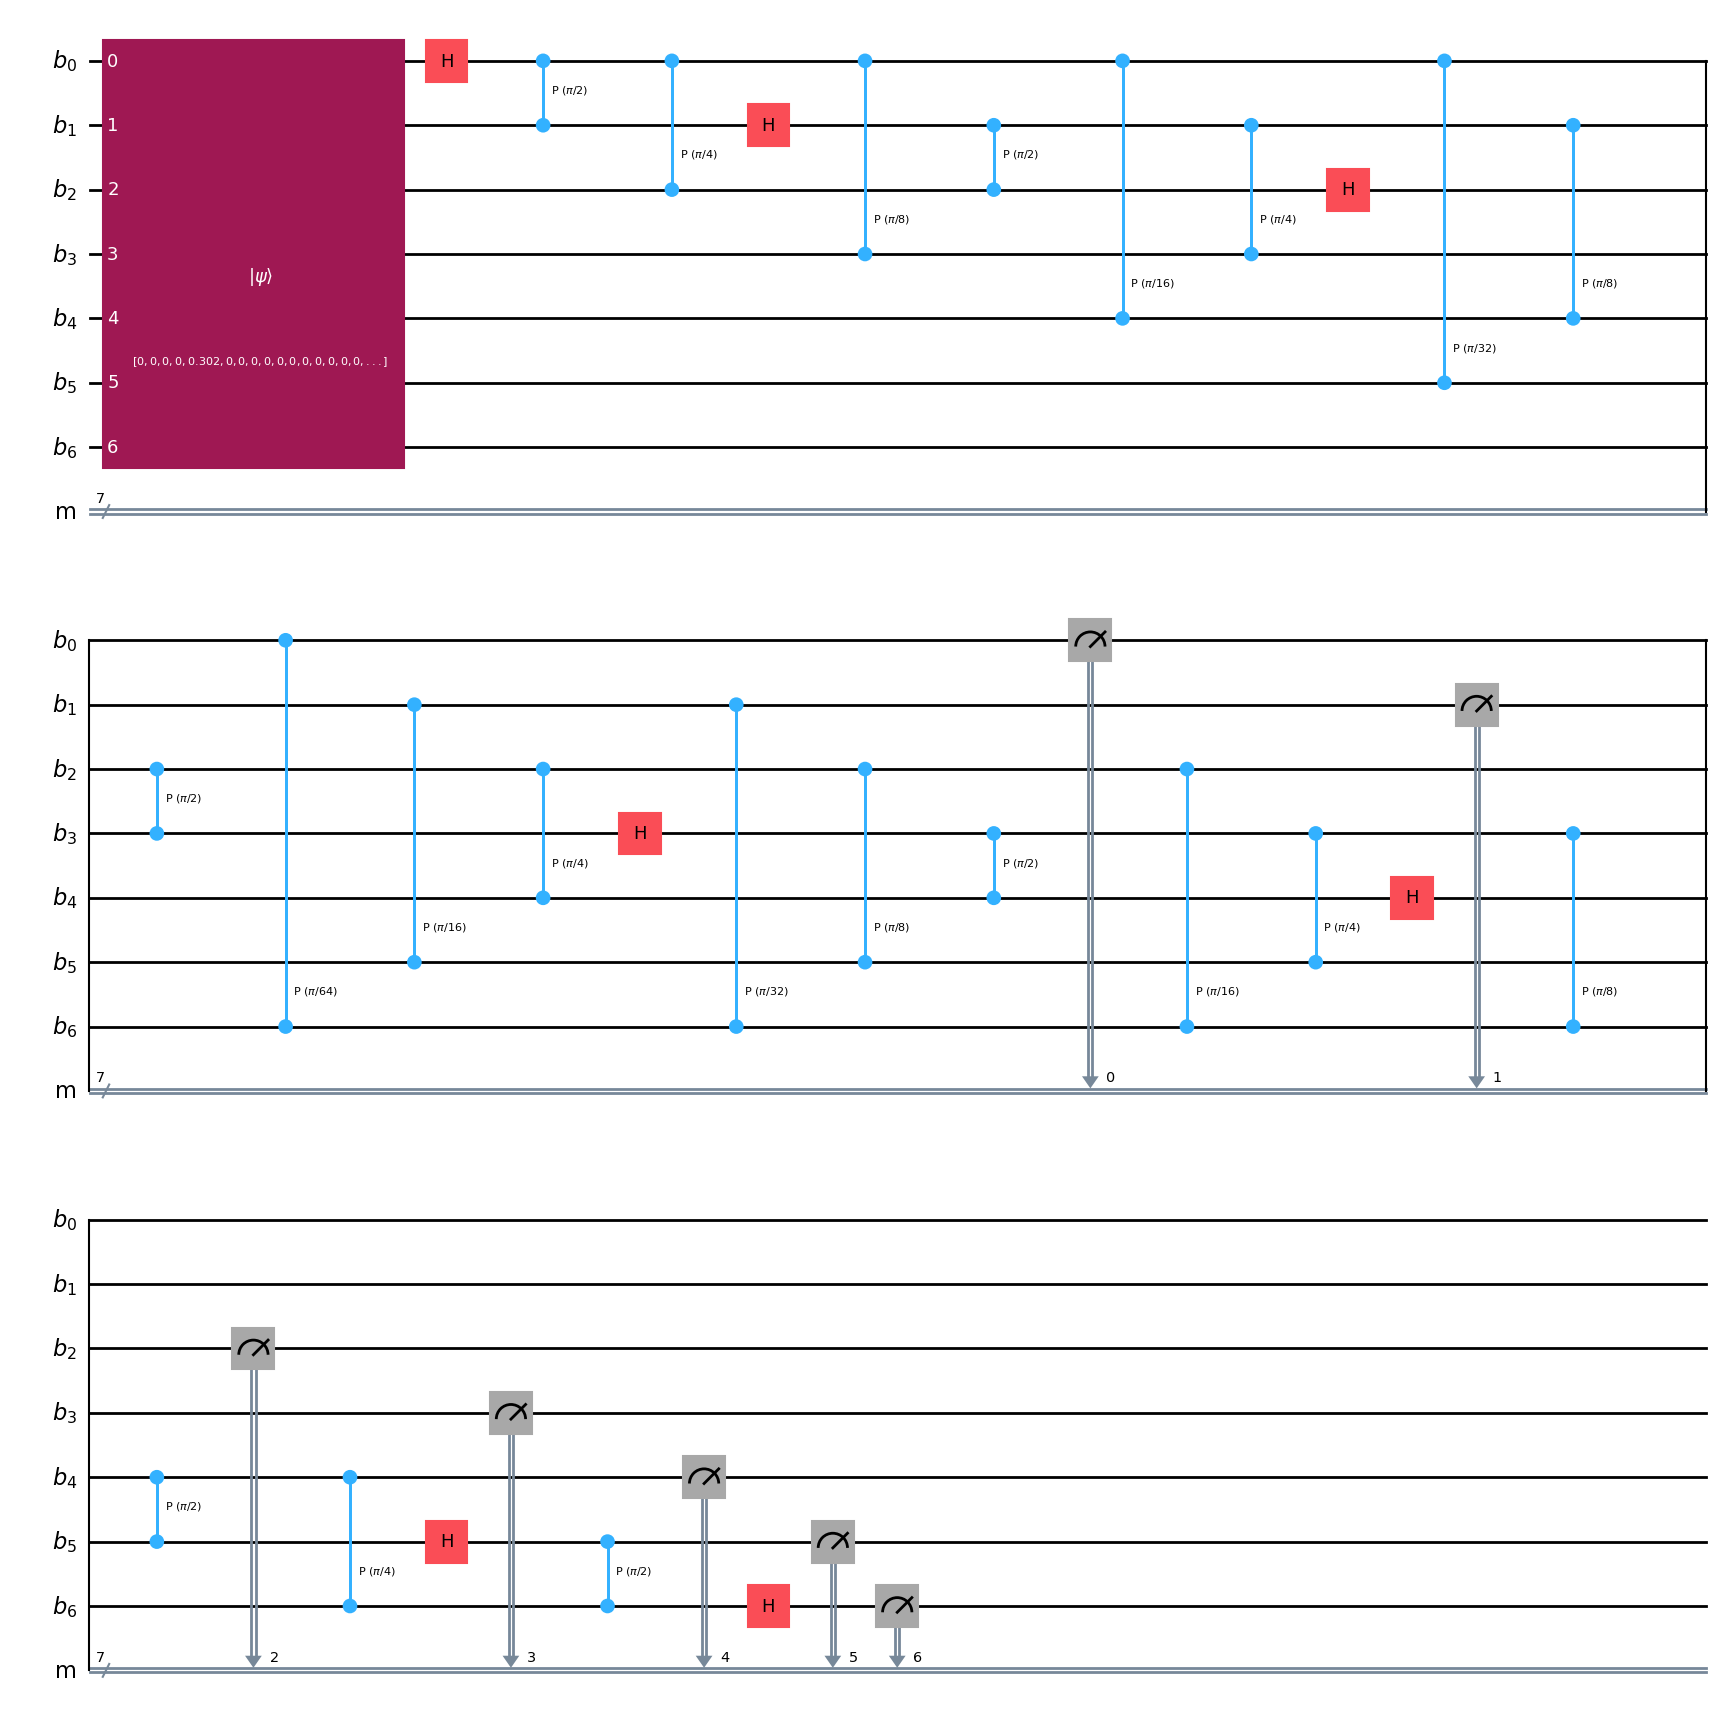

/var/folders/nz/m7btrx796jl1bvgth7q4y5wm0000gn/T/ipykernel_5835/2490543790.py:17: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('aer_simulator')


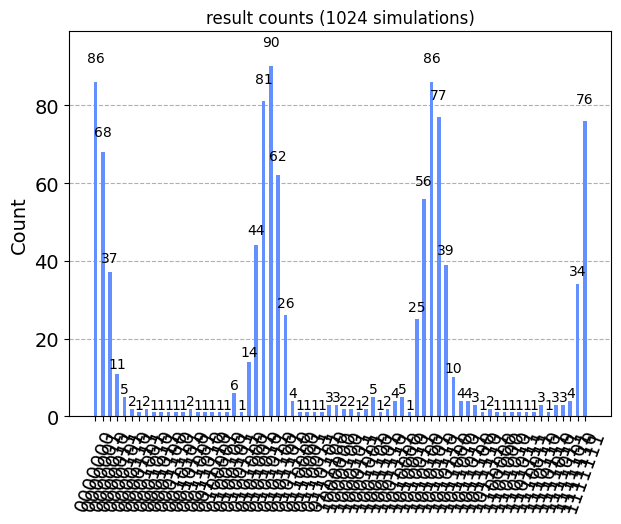

 Measurements obtained 75% of the time.
	 Measurement 43 is obtained with probability 0.087890625
		 43 * 12/2^7 = 4.03125
	 Measurement 85 is obtained with probability 0.083984375
		 85 * 12/2^7 = 7.96875
	 Measurement 0 is obtained with probability 0.083984375
		 0 * 12/2^7 = 0.0
	 Measurement 42 is obtained with probability 0.0791015625
		 42 * 12/2^7 = 3.9375
	 Measurement 86 is obtained with probability 0.0751953125
		 86 * 12/2^7 = 8.0625
	 Measurement 127 is obtained with probability 0.07421875
		 127 * 12/2^7 = 11.90625
	 Measurement 1 is obtained with probability 0.06640625
		 1 * 12/2^7 = 0.09375
	 Measurement 44 is obtained with probability 0.060546875
		 44 * 12/2^7 = 4.125
	 Measurement 84 is obtained with probability 0.0546875
		 84 * 12/2^7 = 7.875
	 Measurement 41 is obtained with probability 0.04296875
		 41 * 12/2^7 = 3.84375
	 Measurement 87 is obtained with probability 0.0380859375
		 87 * 12/2^7 = 8.15625
	 Measurement 2 is obtained with probability 0.0361328125
		

In [9]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, transpile
from numpy import pi, sqrt
from qiskit.tools.visualization import plot_histogram

b = QuantumRegister(7, 'b')
m_out = ClassicalRegister(7, 'm')
qc = QuantumCircuit(b, m_out)
lst = [4, 16, 28, 40, 52, 64, 76, 88, 100, 112, 124]
c = 1.0/sqrt(len(lst))
state_vector = [c if i in lst else 0.0 for i in range(128)]
print('initial super position is : ', state_vector)
qc.initialize(state_vector, b)
implement_seven_qubit_QFT(qc, b)
qc.measure(b, m_out)
display(qc.draw('mpl', style='iqp'))
# Let's run this circuit and see what we get 
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
display(plot_histogram(counts, title='result counts (1024 simulations)'))
res_list=[(0,0) ]*1024
#print(counts)
for (k, v) in counts.items():
    j = int(k, 2)
    res_list[j] = (v/1024, j)
res_list.sort(reverse=True)
sum = 0.0
j = 0
print(' Measurements obtained 75% of the time.')
while sum <= 0.75:
    sum = sum + res_list[j][0]
    print(f'\t Measurement {res_list[j][1]} is obtained with probability {res_list[j][0]}')
    meas = res_list[j][1]
    # test that meas * r/2^m is very close to an integer. Here we know r = 12 (secretly) and m = 7 qubits
    print(f'\t\t {meas} * 12/2^7 = {meas * 12/2**7}')
    j = j + 1

Observe that at least 80\% of the time,  every measurement $\mathsf{meas}$ we obtain from the QFT circuit satisfies the constraint 

$$ \mathsf{meas} \times \frac{r}{2^m}  \ \ \mathsf{is\ very\ close\ to\ a\ whole\ number} $$

# Problem 3

In this problem, we will explore the continued fraction method to extract the possible order $r$ of $a$ from a measurement $\mathsf{meas}$. We know with high probability, that 

$$\frac{\mathsf{meas}}{2^m} \approx \frac{j}{r} $$ 
for some natural number $j$ and the order $r$ that we are seeking.

In general, $\frac{\mathsf{meas}}{2^m}$ is a decimal number between $[0, 1]$. We will use a very important technique called _continued fraction_ approximation to obtain possible valued of $\frac{j}{r}$.

## Continued Fractions

A continued fraction is a number of the form 

$$\frac{ 1}{a_0 + \frac{1}{a_1 + \frac{1}{a_2 + \frac{1}{\ddots + \frac{1}{a_{n-1}} }}}}$$

wherein $a_0, a_1, a_2, \cdots, a_{n-1}$ are natural numbers $\geq 1$.

As an example, for $n=3$ with $a_0 = 1, a_1 = 2, a_2 = 2$, the continued fraction is 

$$ \frac{1}{1+ \frac{1}{2 + \frac{1}{2}}}  = \frac{5}{7}$$

### Part A 
Write a function `get_continued_fraction(lst)` which given a list of numbers $[a_0, \ldots, a_{n-1}]$
computes the continued fraction:

$$\frac{ 1}{a_0 + \frac{1}{a_1 + \frac{1}{a_2 + \frac{1}{\ddots + \frac{1}{a_{n-1}} }}}}$$

Your function should return a pair of integers $(a,b)$ where $b \not= 0$.

For example: `get_continued_fraction([1, 2, 2])` should return `(5,7)`

In [10]:
def get_continued_fraction(lst):
    assert len(lst) >= 1
    # your code here
    n = len(lst)
    a,b = 1,lst[n-1]
    for i in range(n-2,-1,-1):
        a,b = b,lst[i]*b+a
    return a,b
    raise NotImplementedError

In [11]:
(n4, d4) = get_continued_fraction([5])
print(f'Test # 0: {n4}/{d4}')
assert n4 == 1 and d4 == 5

(n1, d1) =  get_continued_fraction([1,2,2])
print(f'Test # 1: {n1}/{d1}')
assert n1 == 5 and d1 == 7

(n2, d2) = get_continued_fraction([1, 2, 1, 2, 1])
print(f'Test # 2: {n2}/{d2}')
assert n2 == 11 and d2 == 15

(n3, d3) = get_continued_fraction([1,1,1,1,1,1])
print(f'Test # 3: {n3}/{d3}')
assert n3 == 8 and d3 == 13


Test # 0: 1/5
Test # 1: 5/7
Test # 2: 11/15
Test # 3: 8/13


### Part B

Now our goal is to compute a continued fraction representation for a fraction $\frac{a}{b}$ where 
$0 < a < b$. In other words, find numbers $a_0, a_1, a_2, \ldots, a_{n-1}$ such that 

$$\frac{a}{b} = \mathsf{ContinuedFraction}([a_0, \ldots, a_{n-1}]) = \frac{1}{a_0 + \frac{1}{a_1 + \frac{1}{\ddots + \frac{1}{a_{n-1}}}}}$$

We wish to write  $\frac{a}{b} = \frac{1}{a_0 + \epsilon}$, wherein $a_0$ is a natural number and $0 \leq \epsilon < 1$ is the "residue".

Therefore, $a_0 + \epsilon = \frac{b}{a}$. $a_0 = \left\lfloor \frac{b}{a} \right\rfloor$ (the quotient when $b$ is divided by $a$).
$$\epsilon = \frac{b}{a} - a_0 = \frac{b - a a_0} {a} = \frac{b \bmod a}{a} $$

If $\epsilon \not= 0$, we will _recursively_ convert $\epsilon = \frac{b \mod a}{a}$ into a continued fraction.
The new value of "$a$" is $b \bmod a$ and the new value of "$b$" is the old value of $a$ (notice the strange similarity to Euclid's algorithm?).

Suppose we get $\epsilon = \mathsf{ContinuedFraction}([a_1, \ldots, a_{n-1}])$ then $\frac{a}{b} = \mathsf{ContinuedFraction}[a_0, a_1, \ldots, a_{n-1}]$.
 
#### Example 

Let us illustrate the process through an example using $\frac{2}{3}$ with $a = 2$ and $b= 3$.

$$ \frac{2}{3} = \frac{1}{a_0 + \epsilon} $$

We get $a_0 + \epsilon = \frac{3}{2}$. Therefore, $a_0 = 1$ and $\epsilon = \frac{1}{2}$.

We recursively, convert $\frac{1}{2}$ into a continued fraction.

We have $\frac{1}{2} = \frac{1}{a_1 + \epsilon_1}$. We get $a_1 + \epsilon_1 = 2$. Therefore, $a_1 = 2$ and
$\epsilon_1 = 0$.

We stop when $\epsilon_1 = 0$. We have $\frac{2}{3} = \frac{1}{1 + \frac{1}{2}}$.

Write a function `make_continued_fraction(a, b)` given numerator `a` and denominator `b`  wherein 
$ 0 < a \leq b$ that returns a list $[a_0, \ldots, a_{n-1}]$ corresponding to the continued fraction representation of $\frac{a}{b}$.

In [12]:
def make_continued_fraction(a, b):
    assert a > 0
    assert a <= b
    # your code here
    lst = []
    while b > 0:
        if a//b != 0: lst.append(a//b)
        a,b = b,a%b
    return lst
    raise NotImplementedError

In [13]:
f1 = make_continued_fraction(197, 1024) 
print(f'197/1024 = ContinuedFraction({f1})')
assert f1 == [5, 5, 19, 2]

f2 = make_continued_fraction(64, 128) 
print(f'64/128 = ContinuedFraction({f2})')
assert f2 == [2]


f3 = make_continued_fraction(1, 1) 
print(f'1/1 = ContinuedFraction({f3})')
assert f3 == [1]

f4 = make_continued_fraction(314157,1000000)
print(f'314157/1000000 = ContinuedFraction({f4})')
assert f4 == [3, 5, 2, 5, 1, 7, 1, 2, 3, 2, 1, 15]

197/1024 = ContinuedFraction([5, 5, 19, 2])
64/128 = ContinuedFraction([2])
1/1 = ContinuedFraction([1])
314157/1000000 = ContinuedFraction([3, 5, 2, 5, 1, 7, 1, 2, 3, 2, 1, 15])


### Part C 

Continued Fraction approximation works as follows. Suppose

$$\frac{a}{b} = \mathsf{ContinuedFraction}([a_0, \ldots, a_{n-1}])$$

We can approximate $\frac{a}{b}$ by a series of fractions given by 
  - $\mathsf{ContinuedFraction}([a_0])$
  - $\mathsf{ContinuedFraction}([a_0,a_1])$
  - $\mathsf{ContinuedFraction}([a_0, a_1, a_2])$
  - $\cdots$
  - $\mathsf{ContinuedFraction}([a_0, a_1, a_2, \ldots, a_{n-1}])$ which just yields back the original fraction.


We can apply this to Shor's algorithm to recover the order $r$ from a measurement $\mathsf{meas}$. We wanted to approximate $\frac{\mathsf{meas}}{2^m} \approx \frac{j}{r}$ from which the denominator $r$ is a possible candidate for the 
order of $a$. We can always test it quite easily by computing $a^r \bmod n$ using modular exponentiation and checking if it equals $1$.
   - Compute a continued fraction of $\frac{\mathsf{meas}}{2^m} = \mathsf{ContinuedFraction}([a_0, \ldots, a_{n-1}])$
   - Calculate the successive approximations in terms of fractions as described above. Run $i$ from $0$ to $n-1$.
      - $ \mathsf{ContinuedFraction}([a_0, \ldots, a_{i}]) = \frac{j'}{r'} = \frac{2j'}{2r'} = \frac{3j'}{3r'} $. 
      - Test to check if they satisfy $a^{r'} \bmod n = 1$, $a^{2r'} \bmod n = 1$ or $a^{3r'} \bmod n = 1$. If yes, return the order.
      - Although, we can keep going with $4r', 5r'$ and so on but as a heuristic, we will stop at $3r'$.
   - If no order found, declare failure.
   
Write a function `extract_order(meas, m, a, n)` given a measurement `meas`, number of qubits `m`, a number `a` that is relatively prime to `n`.  The function return the order `r` if found using the successive approximation described above. If you cannot find the order, return `None`.

A modular_exponentiation function is given to you.

In [14]:
def modular_exponentiate(a, k, n): # a^k \mod n
    mu = a
    res = 1
    while k > 0:
        if k % 2 == 1:
            res = (res * mu) % n   
        mu = (mu * mu) % n
        k = k // 2
        
    return res

In [15]:
def extract_order(meas, m, a, n):
    # your code here
    k = make_continued_fraction(meas, 2**m)
    for i in range(1,len(k)+1):
        p,q = get_continued_fraction(k[:i])
        for j in range(1,a):
            if modular_exponentiate(a,j*q,n) == 1:
                return j*q
    return None
    raise NotImplementedError

In [16]:
r1 = extract_order(75, 7, 5, 91)
assert r1 == 12

r2 = extract_order(53, 7, 5, 91)
assert r2 == 12

r3 = extract_order(96, 7, 5, 91)
assert r3 == 12


r4 = extract_order(32, 7, 5, 91)
assert r4 == 12


r5 = extract_order(64, 7, 5, 91)
assert r5 == None



r6 = extract_order(11, 7, 5, 91)
assert r6 == 12


Notice that most of the measurements help us recover the order $r$. We can make the guarantees of this process more formal using ideas from the area of Diophantine approximation but this is beyond the scope of this class.

### Solutions to Selected Manual Answer Problems.

### Problem 1

(A) 6

(B) Note that $10^6 \mod 77 = 1$. Therefore $100^3 \mod 77 = 1$. Suppose we took $a = 100 \mod 77 = 23$, it will have order $3$.

(C) We will have $10^3 \mod 77 = 76$. Unfortunately, $76 + 1 \bmod 77 = 0$. We will not be able to extract any non-trivial factor of $77$.

(D)Order of $a$ modulo $77$ is $6$. We have $12^3 \mod 77 = 34$. We obtain $GCD(33, 77) = 11$. 

### Problem 2

(A) $\ket{\psi} = \frac{1}{2} \left( \ket{3} + \ket{7} + \ket{11} + \ket{15} \right)$